# **Convolutional Neural Networks - Intro**

## Table of Contents
- [Theory](#theory)
    - [What is convolution?](#conv)
    - [CNNs](#cnns)
    - [Specific Layers](#conv_layers)
- [Image Classification](#im_cnn)
    - [Transfer Learning](#tl)
- [Music Genre classification](#other_cnn)

## **Theory** <a class="anchor" id="theory"></a>

### **What is convolution?** <a class="anchor" id="conv"></a>

In the context of signal processing, **convolution** involves applying a filter (kernel) to an input signal to produce an output with some desired properties.

Convolution can be defined in an arbitrary number of dimensions, for example:
- 1D - time series modeling, audio signal processing
- 2D - image blurring, edge detection
- 3D - video processing, volumetric medical data
- 4D - [Minkowski Convolutional Neural Networks](https://openaccess.thecvf.com/content_CVPR_2019/papers/Choy_4D_Spatio-Temporal_ConvNets_Minkowski_Convolutional_Neural_Networks_CVPR_2019_paper.pdf) for spatio-temporal perception
- 5D, 6D, 7D, ... - 🤔??

### **1D Convolution ⬅️➡️**

Given a 1D input signal $x = [x_1, x_2, \dots, x_n] \in \mathbb{R}^n$ and a 1D kernel $w = [w_1, w_2, \dots, w_k] \in \mathbb{R}^k$, the output $y = [y_1, y_2, \dots, y_{n-k+1}] \in \mathbb{R}^{n-k+1}$ is defined as follows:
$$y = x \ast w$$
$$y_i = \sum_{m=0}^{k-1} w_m x_{i+m},\, \forall i \in \{1, \dots, n-k+1\}$$

which are given by the sum of succesive dot products between input $x$ and shifted versions of kernel $w$ (in this case, with a *stride* of 1).

### **2D convolution ⬅️➡️,⬆️⬇️**

Given a 2D input signal $X = \{x_{i, j}\}_{1\leq i \leq N, \,1\leq j \leq M} \in \mathbb{R}^{N\times M}$ and a 2D kernel $W = \{w_{i, j}\}_{1\leq i \leq K, \,1\leq j \leq K} \in \mathbb{R}^{K\times K}$, the output $Y = \{y_{i, j}\}_{1\leq i \leq N-K+1, \,1\leq j \leq M-K+1} \in \mathbb{R}^{N-K+1\times M-K+1}$ is defined as follows:
$$Y = X \ast W$$
$$y_{i, j} = \sum_{n=0}^{K-1} \sum_{m=0}^{K-1} w_{n, m} x_{i+n, j+m},\, \forall (i, j) \in \{1, \dots, N-K+1\} \times \{1, \dots, M-K+1\}$$

which are given by *sliding* the kernel $W$ along $K\times K$ neighbourhoods from the input signal $X$, centered in $(i, j)$, and taking succesive dot products between $X$ and $W$. 

<div style="text-align: center;">
  <img src="imgs/conv_gif.gif" alt="description" width="600"/>
  <figcaption>2D Conv Animation</figcaption>
</div>

### **Convolutional Neural Networks (CNNs)** <a class="anchor" id="cnns"></a>

<div style="text-align: center;">
  <img src="imgs/cnn.PNG" alt="description" width="1000"/>
  <figcaption>Diagram of a simplified CNN used for classification. <a href="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*Vior6yy6_qN5rBv5Os0kGA.png">Source</a></figcaption>
</div>

### **1D Convolution** (for CNNs)

Given a feature tensor $X$ of shape $(B, C_{in}, L_{in})$, a kernel $W$ of shape $(C_{out}, C_{in}, K)$, and an output $Y$ of shape $(B, C_{out}, L_{out})$, where $C_{in}/C_{out}$ represent the number of input/output channels, $B$ the batch size, and $L_{in}/L_{out}$ the length of input/output sequences, the 1D convolution is given by:

$$Y_{b, c_{\text{out}}, l} = \sum_{c_{\text{in}}=1}^{C_{\text{in}}} \sum_{m=0}^{K-1} X_{b, c_{\text{in}}, l S + m}  W_{c_{\text{out}}, c_{\text{in}}, m},\, \forall b\in\{1, \dots, B\}, c_{\text{out}}\in \{1, \dots, C_{out}\}, l\in \{1, \dots, L_{out}\}
$$

where $S$ denotes the *stride* by which the kernel is shifted along the convolution dimension. For a $S \geq 1$, the length of the output sequence is given by the following:
$$L_{\text{out}} = \left\lfloor \frac{{L_{\text{in}} - K}}{S} \right\rfloor + 1
$$

Therefore, a stride $S > 1$ can be seen as a [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) operation, filtering the most general features, while reducing the influence of underlying noise. 

This convolution can be seen as a multi-input multi-output (**MIMO**) operation, where $X$ is composed of multiple ($C_{in}$) input sequences of length $L_{in}$ and $Y$ is built by independently convolving X with  $C_{out}$ filters, each filter having the dimensionality $(C_{in}, K)$.

### **2D Convolution** (for CNNs)

Analogously, for a feature tensor $X$ of shape $(B, C_{in}, H_{in}, W_{in})$, a kernel $W$ of shape $(C_{out}, C_{in}, K, K)$ (it could also be non-square), and an output $Y$ of shape $(B, C_{out}, H_{out}, W_{out})$, the 2D convolution is given by:

$$Y_{b, c_{\text{out}}, h, w} = \sum_{c_{\text{in}}=1}^{C_{\text{in}}} \sum_{m=0}^{K-1} \sum_{n=0}^{K-1} X_{b, c_{\text{in}}, h S + m, w S + n}  W_{c_{\text{out}}, c_{\text{in}}, m, n},\, \forall b\in\{1, \dots, B\}, c_{\text{out}}\in \{1, \dots, C_{out}\}, (h, w)\in \{1, \dots, H_{out}\} \times \{1, \dots, W_{out}\}
$$

<div style="text-align: center;">
  <img src="imgs/cnn_2.png" alt="description" width="500"/>
  <figcaption>2D Conv diagram, using 3D tensors</figcaption>
</div>

This can also be seen as $C_{out}$ succesive independent convolutions between input $X$ and filters of shape $(C_{in}, K, K)$, each of which results in a single-channel output of shape $(H_{out}, W_{out})$. Note that the kernel $W$ is constructed and applied s.t. all input channels contribute to the output.

**Note: The dimensionality of the convolution operation refers to the number of directions the kernel *moves* along the input tensor, not the dimensionality of the kernel!**

There are many other varieties of convolution: [Pointwise](https://paperswithcode.com/method/pointwise-convolution), [Dilated](https://www.geeksforgeeks.org/dilated-convolution/), [Depthwise Separable](https://paperswithcode.com/method/depthwise-separable-convolution), [Spatially Separable](https://paperswithcode.com/method/spatially-separable-convolution), [Grouped](https://blog.yani.ai/filter-group-tutorial/), . . .

### *Why does convolution work?*

- **Local connectivity**: preserves the spatial relationship by taking into account only small regions when computing the output elements
- **Location-invariant**: Convolution can detect patterns regardless their position in the input signal, exhibiting *Translation Invariance* 
- **Parameter sharing**: The same set of weights is used across all spatial locations in the input signal, helping in parameter reduction and robustness to overifitting (compared to fully-connected counterparts)

<div style="text-align: center;">
  <img src="imgs/plane.png" alt="description" width="1200"/>
  <figcaption>2D Conv Example</figcaption>
</div>

### **Specific Layers** <a class="anchor" id="conv_layers"></a>

Let's generate some 1D and 2D data to work on:

In [14]:
from torch.nn import Conv1d, Conv2d, MaxPool1d, MaxPool2d, AvgPool1d, AvgPool2d, AdaptiveMaxPool2d
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
import torch

import sys
sys.path.append("BIOSINF_IA2/L2/")

import utils
import importlib
_ = importlib.reload(utils)

In [15]:
### Generate a 1D signal with multiple channels
frequencies = [0.5, 0, 1.5, 5.0] 
amplitudes = [1.0, 0.5, 0.3, 1.0]    
phases = [0, 0.5, 1.0, 1.5]       

data_1d = utils.generate_toy_signal(1, frequencies, amplitudes, phases)
data_1d.shape

torch.Size([1, 4, 256])

In [17]:
data_2d = read_image("BIOSINF_IA2/L2/imgs/michael_scott.jpg")[None, ...] / 255.0 # add batch dimension & normalize
data_2d.shape

torch.Size([1, 3, 400, 400])

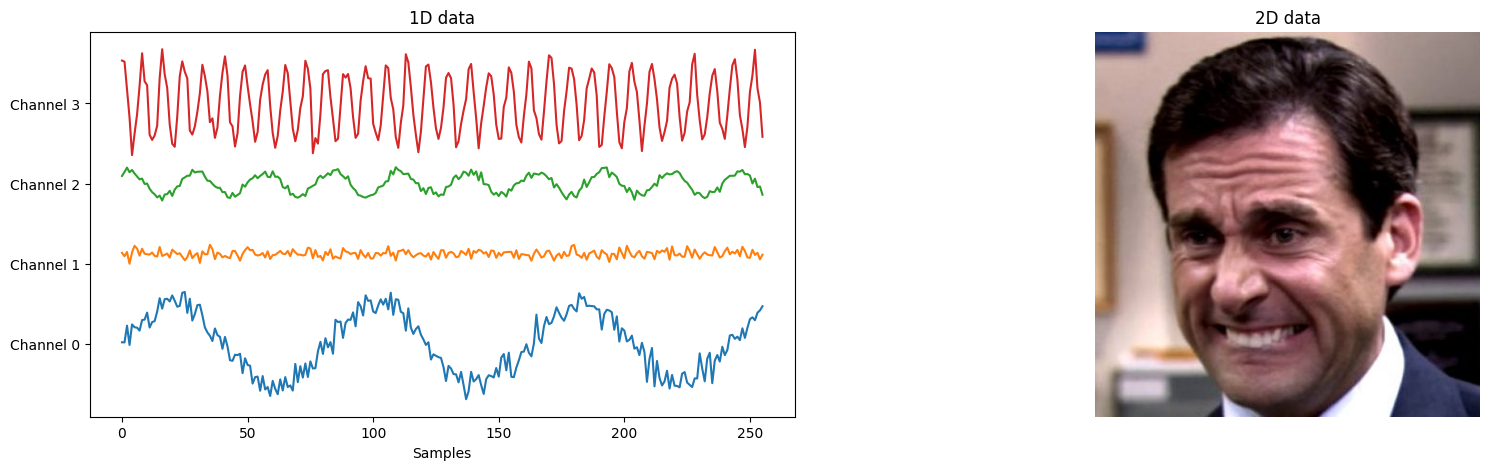

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
utils.plot_channels(data_1d)
plt.title("1D data")
plt.subplot(1, 2, 2)
plt.imshow(data_2d[0].permute(1, 2, 0))
plt.axis("off")
plt.title("2D data")
plt.show()

### I. Conv 1D / Conv 2D

Conv1d with kernel of shape: (3, 4, 5)


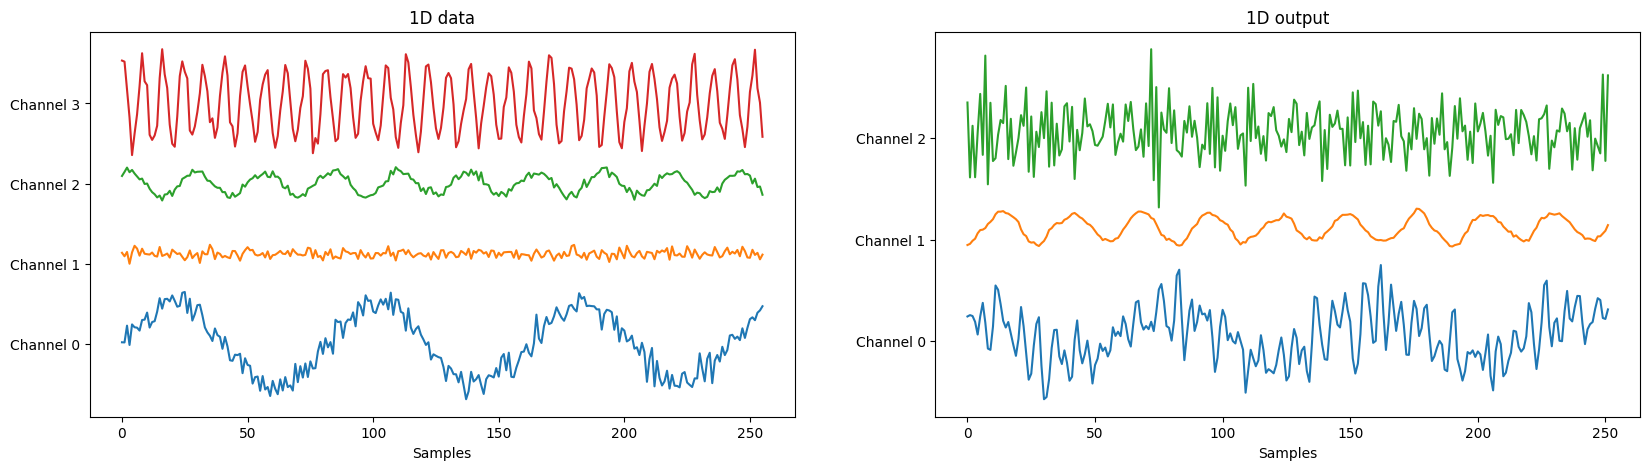

In [19]:
out_channels = 3
kernel_size = 5
conv1d = Conv1d(in_channels=data_1d.shape[1], out_channels=out_channels, kernel_size=kernel_size)

# Add some values to the kernel - (out_channels, in_channels, kernel_size)
weight_data = np.zeros((out_channels, data_1d.shape[1], kernel_size))
print(f"Conv1d with kernel of shape: {weight_data.shape}")

weight_data[0, 0] = np.array([-1, -1, 0, 1, 1]) # this output only dependes on the input channel #0

# weight_data[i] -> (in_channels, K) (while i^th filter); weight_data[i, j] -> (K) (the i^th filter acting on j^th input channel)

weight_data[1, 1] = np.ones(kernel_size) / kernel_size
weight_data[1, 2] = -1 * np.ones(kernel_size) / kernel_size # the second output is the difference between averaged input channel #1 and averaged input channel #2

weight_data[2, -1] = np.array([-1, 1, -1, 1, -1]) # this output only dependes on the last input channel
# Add it to the layer
conv1d.weight.data = torch.tensor(weight_data, dtype=torch.float)

out_1d = conv1d(data_1d)

# Observe the output
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
utils.plot_channels(data_1d)
plt.title("1D data")
plt.subplot(1, 2, 2)
utils.plot_channels(out_1d.detach())
plt.title("1D output")
plt.show()

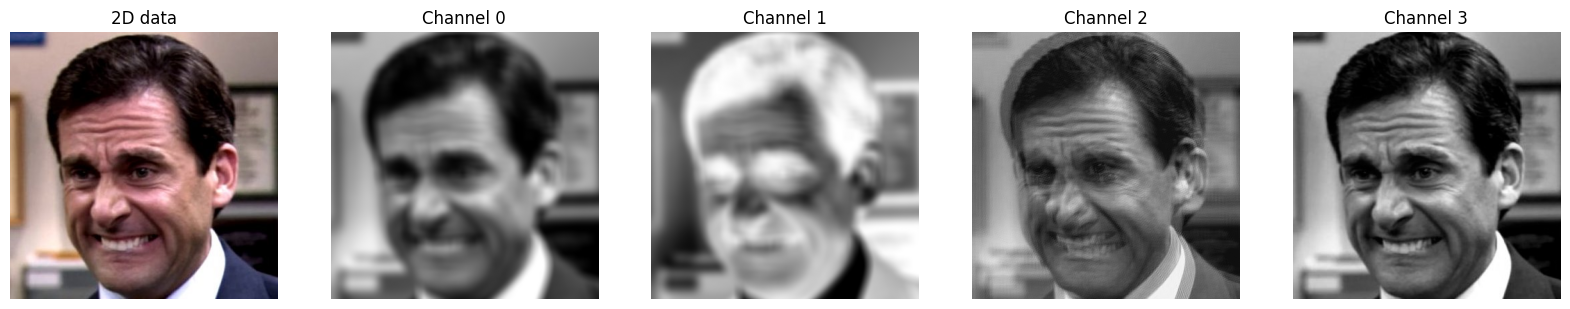

In [20]:
out_channels = 4
kernel_size = 15

conv2d = Conv2d(in_channels=data_2d.shape[1], out_channels=out_channels, kernel_size=kernel_size)

# Add some values to the kernel - (out_channels, in_channels, kernel_size)
weight_data = np.zeros((out_channels, data_2d.shape[1], kernel_size, kernel_size))

weight_data[0] = np.ones((data_2d.shape[1], kernel_size, kernel_size)) / (kernel_size**2)  # average all input channels - a.k.a blurring
weight_data[1] = -np.ones((data_2d.shape[1], kernel_size, kernel_size)) / (kernel_size**2)
vector = [(-1)**i for i in range(kernel_size)]
weight_data[2, 2] = np.diag(np.array(vector))  # performs some operation only on the last (blue) channel
weight_data[3, :, kernel_size // 2, kernel_size // 2] = np.array([0.216, 0.7152, 0.0722])  # RGB to gray weights
# Add it to the layer
conv2d.weight.data = torch.tensor(weight_data, dtype=data_2d.dtype)

out_2d = conv2d(data_2d)

# Observe the output
plt.figure(figsize=(20, 5))
plt.subplot(1, out_channels + 1, 1)
plt.title("2D data")
plt.imshow(data_2d[0].permute(1, 2, 0))
plt.axis("off")
for i in range(out_channels):
    plt.subplot(1, out_channels + 1, i + 2)
    plt.title(f"Channel {i}")
    plt.imshow(out_2d[0, i].detach().numpy(), cmap="gray")
    plt.axis("off")

### II. 1D/2D Max-pooling

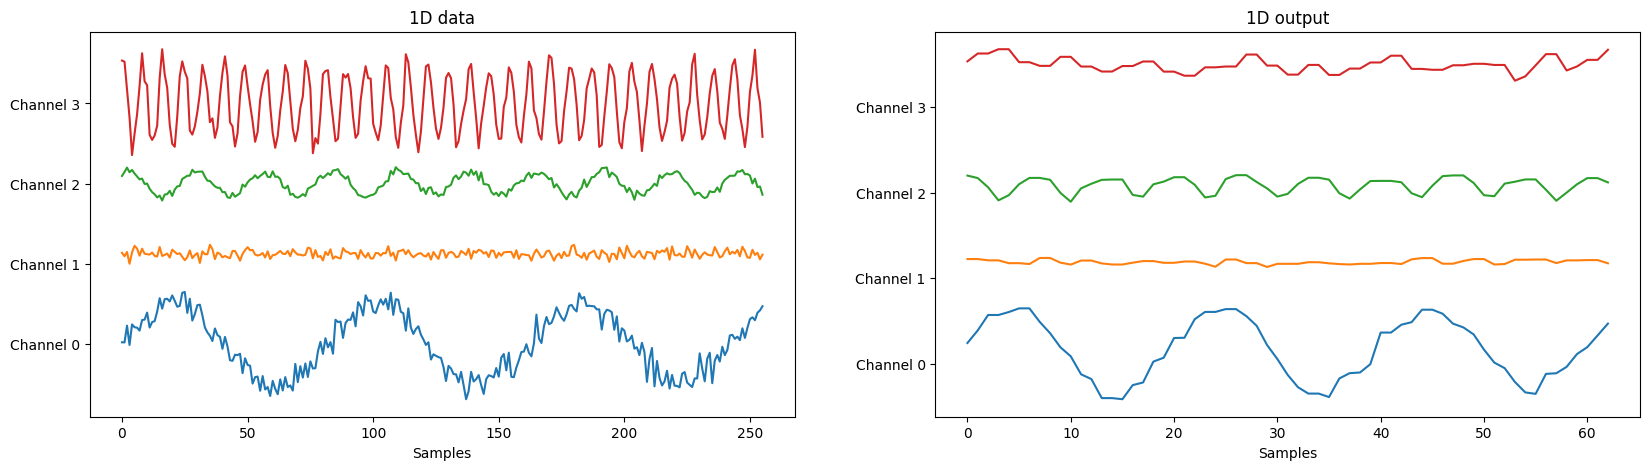

In [21]:
max1d = MaxPool1d(kernel_size=8, stride=4)

out_1d = max1d(data_1d)

# Observe the output
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
utils.plot_channels(data_1d)
plt.title("1D data")
plt.subplot(1, 2, 2)
utils.plot_channels(out_1d.detach())
plt.title("1D output")
plt.show()

(-0.5, 24.5, 24.5, -0.5)

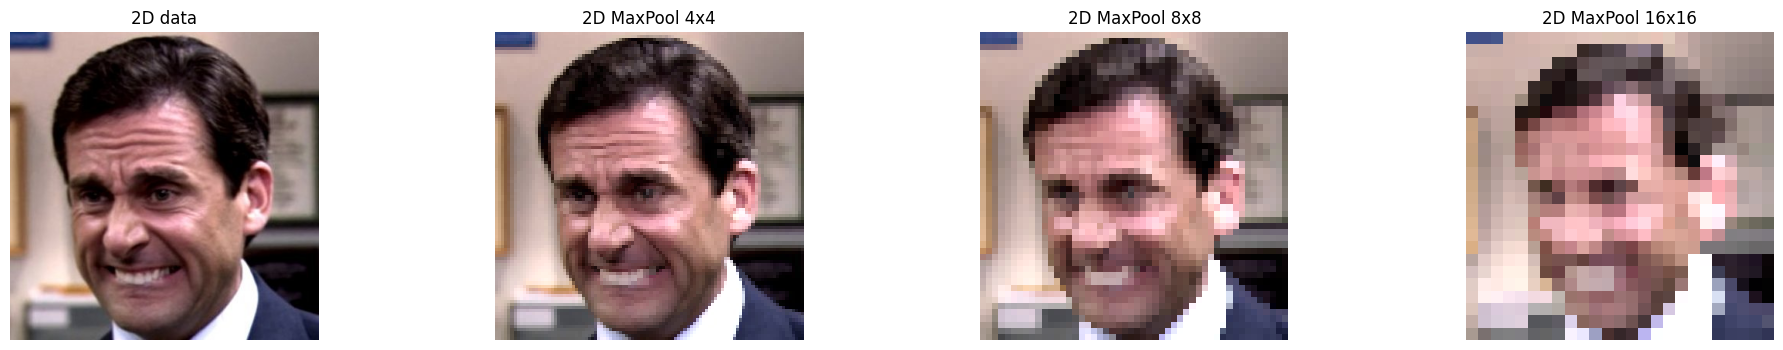

In [22]:
max2d_4 = MaxPool2d(kernel_size=4, stride=4)
max2d_8 = MaxPool2d(kernel_size=8, stride=8)
max2d_16 = MaxPool2d(kernel_size=16, stride=16)

out_2d_4 = max2d_4(data_2d)
out_2d_8 = max2d_8(data_2d)
out_2d_16 = max2d_16(data_2d)

# Observe the output
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.title("2D data")
plt.imshow(data_2d[0].permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 4, 2)
plt.title("2D MaxPool 4x4")
plt.imshow(out_2d_4[0].permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 4, 3)
plt.title("2D MaxPool 8x8")
plt.imshow(out_2d_8[0].permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 4, 4)
plt.title("2D MaxPool 16x16")
_ = plt.imshow(out_2d_16[0].permute(1, 2, 0))
plt.axis("off")

### III. 2D Average-pooling

(-0.5, 368.5, 368.5, -0.5)

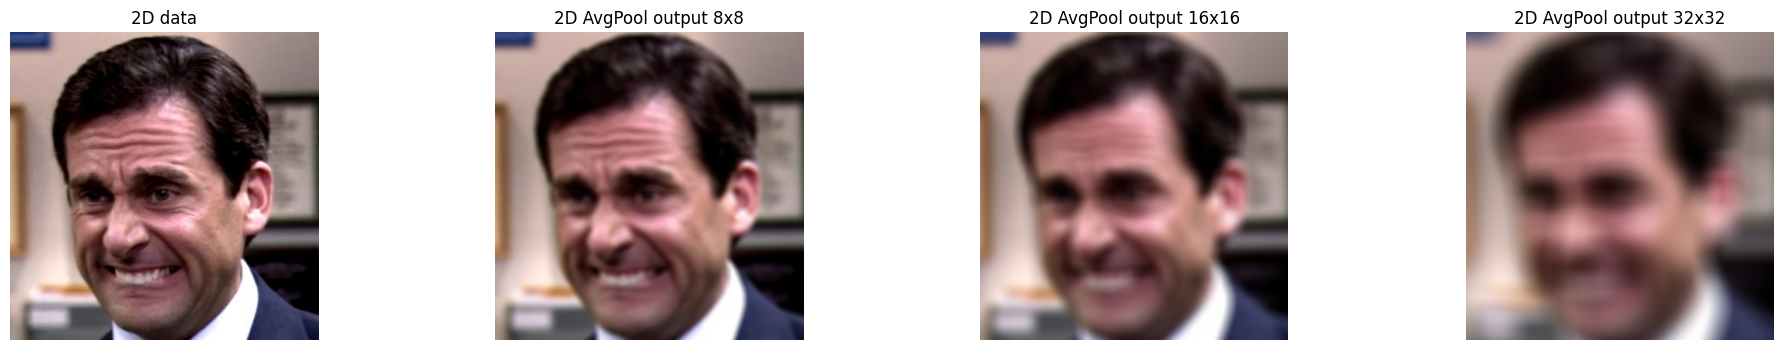

In [23]:
max2d_4 = AvgPool2d(kernel_size=8, stride=1)
max2d_8 = AvgPool2d(kernel_size=16, stride=1)
max2d_16 = AvgPool2d(kernel_size=32, stride=1)

out_2d_4 = max2d_4(data_2d)
out_2d_8 = max2d_8(data_2d)
out_2d_16 = max2d_16(data_2d)

# Observe the output
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.title("2D data")
plt.imshow(data_2d[0].permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 4, 2)
plt.title("2D AvgPool output 8x8")
plt.imshow(out_2d_4[0].permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 4, 3)
plt.title("2D AvgPool output 16x16")
plt.imshow(out_2d_8[0].permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 4, 4)
plt.title("2D AvgPool output 32x32")
_ = plt.imshow(out_2d_16[0].permute(1, 2, 0))
plt.axis("off")

### IV. Padding Layers (Optional)

Conv1d/2d layers can already implement some padding before performing convolution.

### V. Adapttive pooling

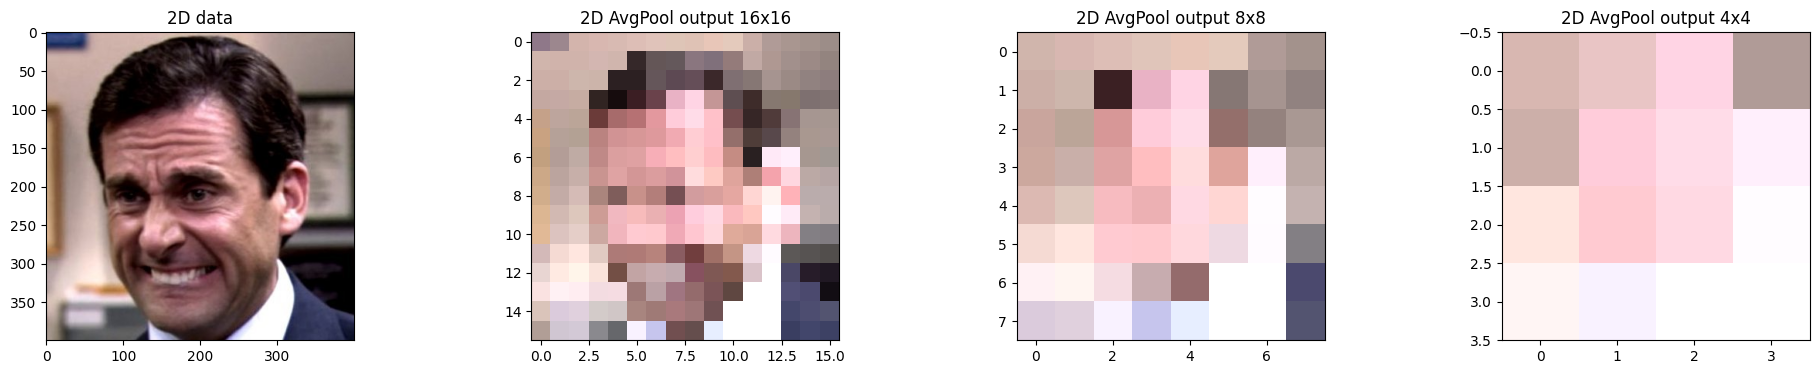

In [24]:
adapt2d_16 = AdaptiveMaxPool2d(16)
adapt2d_8 = AdaptiveMaxPool2d(8)
adapt2d_4 = AdaptiveMaxPool2d(4)

out_2d_16 = adapt2d_16(data_2d)
out_2d_8 = adapt2d_8(data_2d)
out_2d_4 = adapt2d_4(data_2d)

# Observe the output
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.title("2D data")
plt.imshow(data_2d[0].permute(1, 2, 0))
plt.subplot(1, 4, 2)
plt.title("2D AvgPool output 16x16")
plt.imshow(out_2d_16[0].permute(1, 2, 0))
plt.subplot(1, 4, 3)
plt.title("2D AvgPool output 8x8")
plt.imshow(out_2d_8[0].permute(1, 2, 0))
plt.subplot(1, 4, 4)
plt.title("2D AvgPool output 4x4")
_ = plt.imshow(out_2d_4[0].permute(1, 2, 0))

`AdaptivePooling` operators need only to specify the desired output dimension(s), thus not depending on the input resolution! This is important when training CNNs that should be able to operate on various image resolutions.

---

## **Image Classification** <a class="anchor" id="im_cnn"></a>

### GTSRB dataset ⛔

The GTSRB (German Traffic Sign Recognition Benchmark) consists of images of traffic signs commonly encountered on roads in Germany. he dataset comprises 43 different classes, images in the dataset vary in terms of lighting conditions, weather, and viewpoints, and may contain variations in aspect ratio.

In [25]:
import torchvision
import torchvision.transforms as transforms

h, w = 32, 32

data_transform = data_transforms = transforms.Compose([
    transforms.Resize((h, w)),
    transforms.ToTensor(),
])

gtsrb_train = torchvision.datasets.GTSRB(root="./data", split="train", download=True, transform=data_transform)
gtsrb_test = torchvision.datasets.GTSRB(root="./data", split="test", download=True, transform=data_transform)

Images are already normalized $[0, 1]$. Original images have a wide range of resolutions, from $15 \times 15$ to $250 \times 250$ pixels. 

In [26]:
print("Train images: ", len(gtsrb_train), "Test images: ", len(gtsrb_test))

x, y = gtsrb_train[0]
print("Input imaeg range: ", x.min(), x.max())
print("Input image size: ", x.shape)
print("Label: ", y)

Train images:  26640 Test images:  12630
Input imaeg range:  tensor(0.2118) tensor(1.)
Input image size:  torch.Size([3, 32, 32])
Label:  0


In [27]:
label_map = {
    0: 'Limitează la 20 km/h',
    1: 'Limitează la 30 km/h',
    2: 'Limitează la 50 km/h',
    3: 'Limitează la 60 km/h',
    4: 'Limitează la 70 km/h',
    5: 'Limitează la 80 km/h',
    6: 'Limitează la 80 km/h (fără restricție)',
    7: 'Limitează la 100 km/h',
    8: 'Limitează la 120 km/h',
    9: 'Interzis depășirea (în general)',
    10: 'Interzis depășirea camioanelor',
    11: 'Prioritate la trecerea pietonilor',
    12: 'Prioritate la intersecții (în general)',
    13: 'Cedează trecerea',
    14: 'Stop',
    15: 'Interzis accesul (în general)',
    16: 'Interzis accesul camioanelor',
    17: 'Circulație doar într-o direcție',
    18: 'Atenție (în general)',
    19: 'Atenție - Viraj la stânga',
    20: 'Atenție - Viraj la dreapta',
    21: 'Atenție - Drum sinuos',
    22: 'Atenție - Diferență de nivel',
    23: 'Atenție - Suprafața alunecoasă',
    24: 'Atenție - Îngustare de drum',
    25: 'Atenție - Lucrări pe drum',
    26: 'Atenție - Semafor defect',
    27: 'Atenție - Trecere de pietoni',
    28: 'Atenție - Copii',
    29: 'Atenție - Bicicliști',
    30: 'Atenție - Zăpadă sau gheață',
    31: 'Atenție - Animale sălbatice',
    32: 'Sfârșitul restricțiilor (în general)',
    33: 'Viraj la dreapta',
    34: 'Viraj la stânga',
    35: 'Mergi drept',
    36: 'Mergi drept sau la dreapta',
    37: 'Mergi drept sau la stânga',
    38: 'Viraj la dreapta în jos',
    39: 'Viraj la stânga în jos',
    40: 'Sens giratoriu',
    41: 'Sfârșitul interdicției de depășire (în general)',
    42: 'Sfârșitul interdicției de depășire a camioanelor'
}

Check the color distribution in some partition of your data:

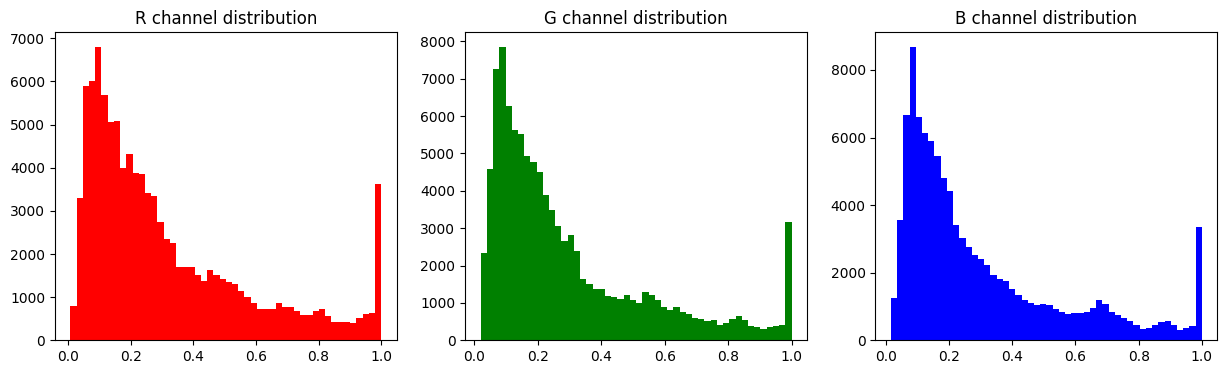

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Collect some data
data_rgb = [[], [], []]
num_samples = 100
for i in range(num_samples):
    im, target = gtsrb_test[i]

    data_rgb[0].append(im[0].numpy().flatten())
    data_rgb[1].append(im[1].numpy().flatten())
    data_rgb[2].append(im[2].numpy().flatten())

data_rgb[0] = np.array(data_rgb[0]).flatten()
data_rgb[1] = np.array(data_rgb[1]).flatten()
data_rgb[2] = np.array(data_rgb[2]).flatten()

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
_ = plt.hist(data_rgb[0], color="red", bins=50)
_ = plt.title("R channel distribution")
plt.subplot(1, 3, 2)
_ = plt.hist(data_rgb[1], color="green", bins=50)
_ = plt.title("G channel distribution")
plt.subplot(1, 3, 3)
_ = plt.hist(data_rgb[2], color="blue", bins=50)
_ = plt.title("B channel distribution")

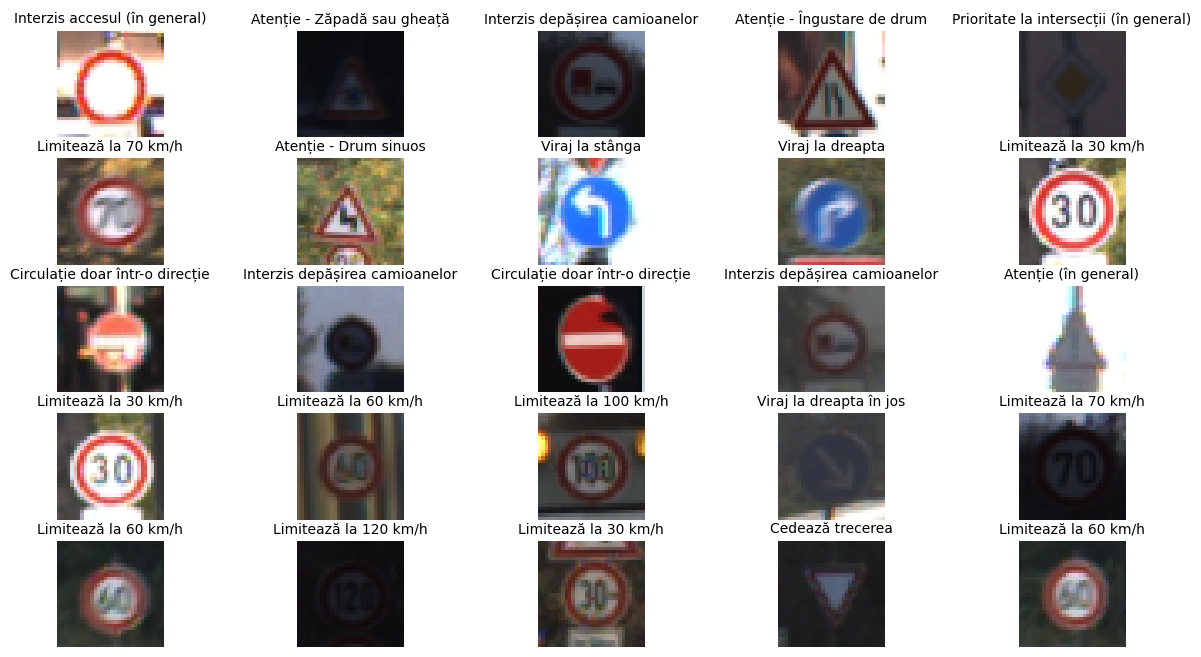

In [29]:
import importlib
import utils
importlib.reload(utils)
from utils import plot_random_images

plot_random_images(gtsrb_test, label_map, rows=5, columns=5)

#### Check Class Distribution

In [30]:
test_targets = [y for x, y in gtsrb_test._samples]
train_targets = [y for x, y in gtsrb_train._samples]

unique_train, counts_train = np.unique(train_targets, return_counts=True)
unique_test, counts_test = np.unique(test_targets, return_counts=True)

assert len(unique_train) == len(unique_test), ValueError("Missing targets.")

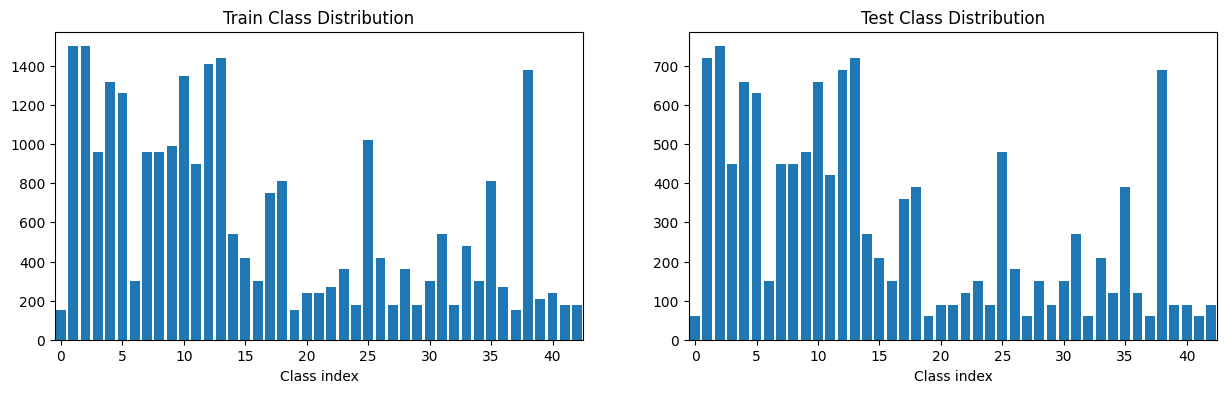

In [31]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title("Train Class Distribution")
plt.bar(unique_train, counts_train)
plt.xlim([min(unique_train) - 0.5, max(unique_train) + 0.5])
plt.xlabel("Class index")
plt.subplot(1, 2, 2)
plt.title("Test Class Distribution")
plt.bar(unique_test, counts_test)
plt.xlim([min(unique_test) - 0.5, max(unique_test) + 0.5])
_ = plt.xlabel("Class index")

#### Define your CNN model class

In [32]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, in_ch, n_classes, *args, **kwargs):
        super(SimpleCNN, self).__init__(*args, **kwargs)

        self.conv_sequence = nn.Sequential(
            nn.Conv2d(in_ch, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
        )

        self.global_pool = nn.AdaptiveMaxPool2d(1)

        self.dense_sequence = nn.Sequential(
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes)
        )
    
    def forward(self, x):
        z1 = self.conv_sequence(x)
        z2 = self.global_pool(z1).view(z1.shape[0], -1) # using .squeeze() instead of .view() won't work for GradCAM!
        z3 = self.dense_sequence(z2)

        return z3

In [33]:
from torchsummary import summary

model = SimpleCNN(in_ch=3, n_classes=43)

summary(model, (3, 64, 64), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
            Conv2d-3           [-1, 32, 64, 64]           4,640
              ReLU-4           [-1, 32, 64, 64]               0
         MaxPool2d-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          18,496
              ReLU-7           [-1, 64, 32, 32]               0
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          36,928
             ReLU-10           [-1, 64, 16, 16]               0
AdaptiveMaxPool2d-11             [-1, 64, 1, 1]               0
           Linear-12                   [-1, 64]           4,160
             ReLU-13                   [-1, 64]               0
           Linear-14                   

**Number of total parameters doesn't change with the input height/width! Why?**

### Training

In [34]:
# Define hyperparameters
batch_size = 128
epochs = 5
lr = 1e-3
print_frequency = 1

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

In [35]:
from torch.utils.data import DataLoader

gtsrb_train_loader = DataLoader(gtsrb_train, batch_size=batch_size, shuffle=True)
gtsrb_test_loader = DataLoader(gtsrb_test, batch_size=batch_size, shuffle=False)

In [36]:
print(f"N.o. train batches: {len(gtsrb_train_loader)}. N.o. test batches: {len(gtsrb_test_loader)}")

N.o. train batches: 209. N.o. test batches: 99


In [37]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cuda.


In [38]:
import os
from tqdm import tqdm
import torch_utils
importlib.reload(torch_utils)

# Define root folder and file_name for saving
folder_path = "models/gtsrb"
file_name = "model.pth"

_ = torch_utils.train_loop(
    model, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path, 
    file_name=file_name,
)

100%|██████████| 99/99 [00:05<00:00, 19.76it/s]


Epoch 1/5: train_loss=3.4549853162902395 train_acc=0.07331081081081081 test_loss=3.3646324234779437 test_acc=0.08891528107680127


100%|██████████| 99/99 [00:04<00:00, 22.69it/s]


Epoch 2/5: train_loss=2.7129166753668534 train_acc=0.22789039039039038 test_loss=2.3345433220718848 test_acc=0.33016627078384797


100%|██████████| 99/99 [00:04<00:00, 22.80it/s]


Epoch 3/5: train_loss=1.6979610286831286 train_acc=0.4623123123123123 test_loss=1.893782994963906 test_acc=0.44299287410926363


100%|██████████| 99/99 [00:04<00:00, 22.72it/s]


Epoch 4/5: train_loss=1.1898291923783042 train_acc=0.6144519519519519 test_loss=1.5977200907890243 test_acc=0.5228028503562946


100%|██████████| 99/99 [00:04<00:00, 22.67it/s]

Epoch 5/5: train_loss=0.8486715287112734 train_acc=0.724512012012012 test_loss=1.3078544332523538 test_acc=0.6328582739509105


#### Inspecting Confusion Matrix

In [39]:
import torch_utils
importlib.reload(torch_utils)

# load best model
model.load_state_dict(
    torch.load(
        os.path.join(folder_path, file_name)
    )["state_dict"]
)
model.to(device)

# get test predictions
y_train, y_train_pred = torch_utils.get_prediction_targets(model, gtsrb_train_loader, device=device)
y_test, y_test_pred = torch_utils.get_prediction_targets(model, gtsrb_test_loader, device=device)

  0%|          | 0/209 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:04<00:00, 22.83it/s]


In [40]:
assert y_train.shape == y_train_pred.shape
assert y_test.shape == y_test_pred.shape

In [41]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_train_pred, normalize="true")
test_cm = confusion_matrix(y_test, y_test_pred, normalize="true")

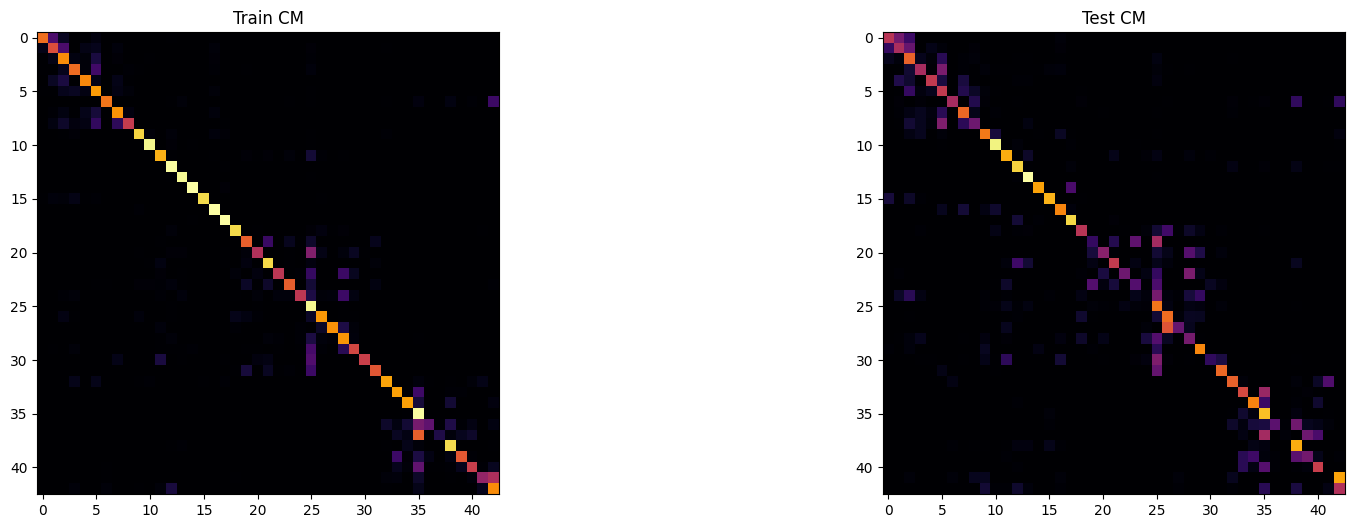

In [42]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Train CM")
plt.imshow(train_cm, cmap="inferno")
plt.subplot(1, 2, 2)
plt.title("Test CM")
_ = plt.imshow(test_cm, cmap="inferno")

### Visualizing Region Importance with Grad-CAM

<div style="text-align: center;">
  <img src="imgs/gradcam.PNG" alt="description" width="800"/>
  <figcaption>Overview of Grad-CAM. Source: <a href=https://arxiv.org/pdf/1611.07450>Grad-CAM: Why did you say that?</a></figcaption>
</div>

In [43]:
try:
    import pytorch_grad_cam 
except:
    !pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.1 MB/s eta 0:00:000:00:01m eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 44.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=391a92f24e8800beea2fcc6bd752a2b81f2dda98b82e70dfbaeac77195fb88f0
  Stored in directory: /home/opis/vvasiles/.cache/pip/wheels/3d/b6/be/e13cccebb2aa8855f678b02ad449e803de1dfbe75853c34b3e
Successfully built grad-cam


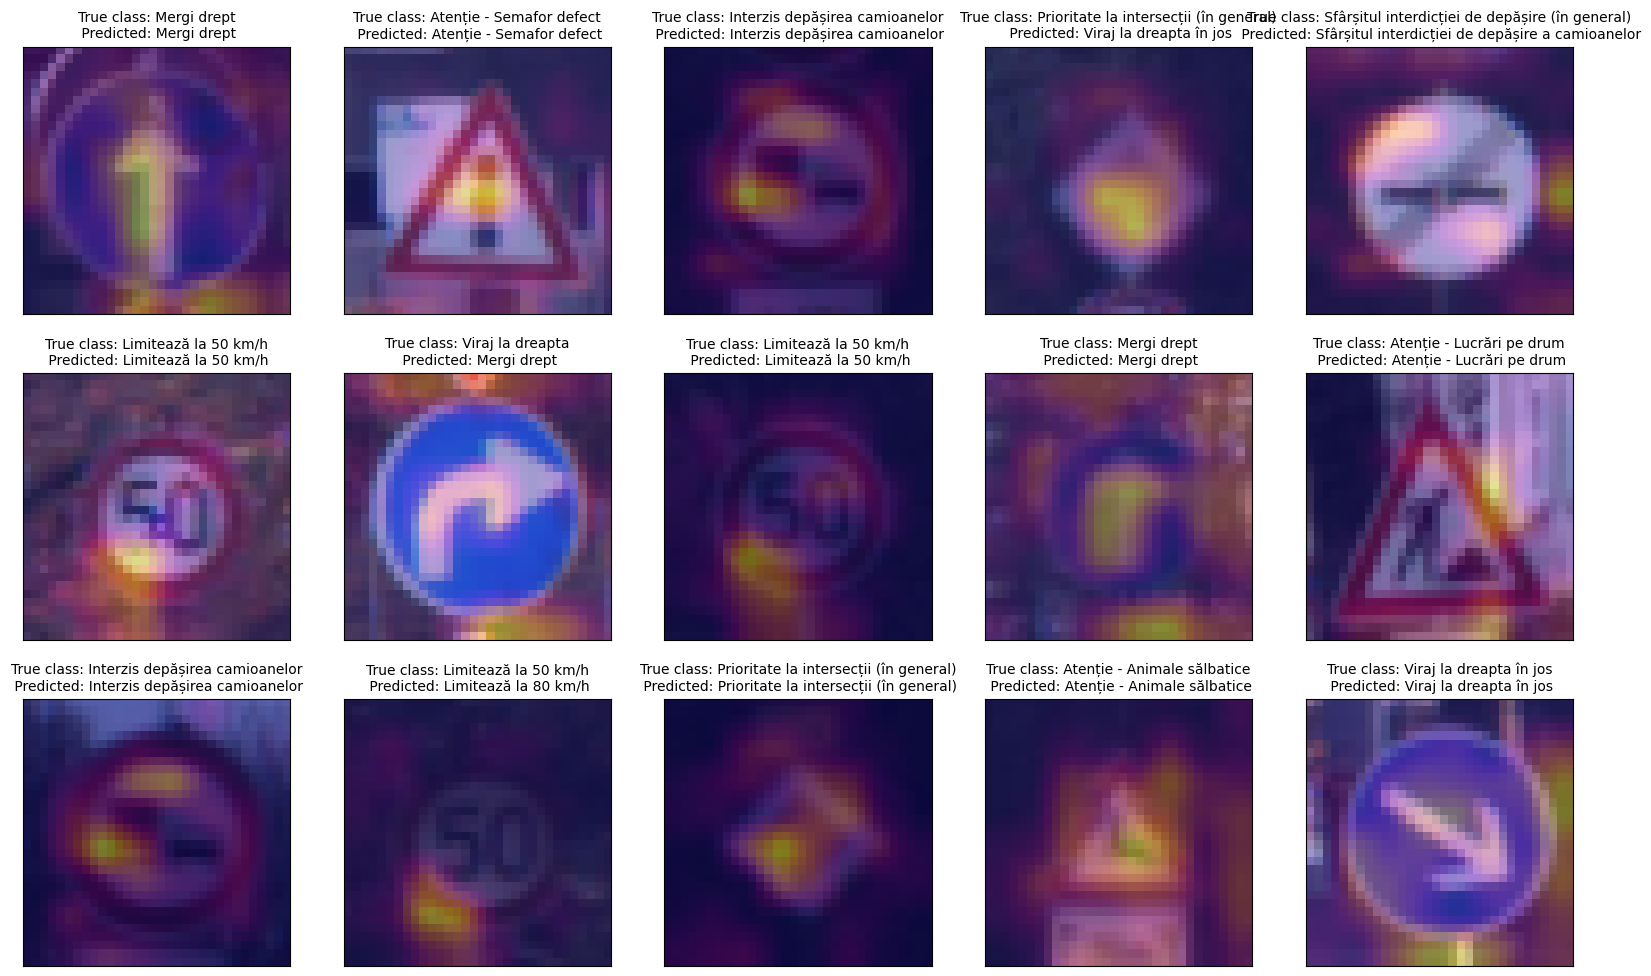

In [44]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
importlib.reload(utils)

n_rows = 3
n_cols = 5
i = 1

plt.figure(figsize=(20, n_rows * 4))

target_layers = [model.conv_sequence[-1]]
gradcam = GradCAM(model, target_layers)

for images, targets in gtsrb_test_loader:
    idx = np.random.randint(0, images.shape[0])

    image = images[idx][None, ...].cpu()
    target = targets[idx][None, ...].cpu()
    target_prep = [ClassifierOutputTarget(target)]
    
    heatmap = gradcam(input_tensor=image, targets=target_prep, aug_smooth=False)

    predicted = torch.argmax(model(image.to(device)), dim=1)[0]

    plt.subplot(n_rows, n_cols, i)
    plt.title(f"True class: {label_map[target.data.numpy()[0]]}\n Predicted: {label_map[predicted.cpu().tolist()]}", fontdict={"fontsize": 10})
    utils.plot_image_with_heatmap_overlay(image[0], heatmap[0], alpha=0.4)

    i += 1
    if i > n_rows * n_cols:
        break
plt.show()

## **Transfer Learning (TL) / Fine-Tuning** <a class="anchor" id="tl"></a>

**Transfer learning** is technique where a model trained on one task is adapted for a second related task. It involves the following stages:
1. Select a pre-trained model $T(\cdot)$ that was trained on a large source dataset $\mathbb{S}$, relevant to your problem
2. Remove the Final Layer(s)
3. Add Task-specific Layers - e.g. for classification, a final Linear layer with `#neurons = #classes` $\rightarrow$ new model $T'(\cdot)$
4. Freeze the weights of pre-trained layers $\rightarrow T'$<sub>❄️</sub>
5. Train $T'$<sub>❄️</sub> for some epochs (usually, only the newly added final layer is updated) on your choice dataset $\mathbb{D}$
6. Fine-tune $T'$<sub>❄️</sub>:
   - Unfreeze all layers $\rightarrow$ $T'_🔥$
   - Train $T'_🔥$ for a number of epochs on $\mathbb{D}$

**TL** is particularly useful when at least one of the following holds: 
- dataset $\mathbb{D}$ is limited;
- we don't have enough computational resources to train $T(\cdot)$ from scratch;
- the domains of source and target tasks are roughly similar.

We'll use the pre-trained models from `torchvision.models`, but you can try other alternatives, such as [HuggingFace](https://huggingface.co/docs/transformers/model_doc/mobilenet_v1).

#### Step 1: load pre-trained model

In [45]:
from torchvision.models import squeezenet1_0

squeezenet = squeezenet1_0(pretrained=True)

/home/opis/vvasiles/.conda/envs/ia2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/opis/vvasiles/.conda/envs/ia2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /home/opis/vvasiles/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 47.1MB/s]


#### Step 2: check the architecture

In [46]:
summary(squeezenet, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 13, 13]          14,208
              ReLU-2           [-1, 96, 13, 13]               0
         MaxPool2d-3             [-1, 96, 6, 6]               0
            Conv2d-4             [-1, 16, 6, 6]           1,552
              ReLU-5             [-1, 16, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           1,088
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8             [-1, 64, 6, 6]           9,280
              ReLU-9             [-1, 64, 6, 6]               0
             Fire-10            [-1, 128, 6, 6]               0
           Conv2d-11             [-1, 16, 6, 6]           2,064
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]           1,088
             ReLU-14             [-1, 6

The final `Sequential` can be accessed by `squeezenet.classifier`. We'll modify this to fit out task.

<ins>Obs.</ins>: Other pre-trained models have different output structure. E.g., the output of `resnet18` can be accessed through `resnet18.fc`.

#### Step 3: freeze the model's parameters

In [47]:
for param in squeezenet.parameters():
    param.requires_grad = False

#### Step 4: replace the final layer with something fit for the current task

In [48]:
squeezenet.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
  (2): ReLU(inplace=True)
  (3): AdaptiveAvgPool2d(output_size=(1, 1))
)

In [52]:
squeezenet.classifier = nn.Sequential(
    nn.Conv2d(512, 43, 1, 1),
    nn.Flatten()
)

In [53]:
summary(squeezenet, (3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 13, 13]          14,208
              ReLU-2           [-1, 96, 13, 13]               0
         MaxPool2d-3             [-1, 96, 6, 6]               0
            Conv2d-4             [-1, 16, 6, 6]           1,552
              ReLU-5             [-1, 16, 6, 6]               0
            Conv2d-6             [-1, 64, 6, 6]           1,088
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8             [-1, 64, 6, 6]           9,280
              ReLU-9             [-1, 64, 6, 6]               0
             Fire-10            [-1, 128, 6, 6]               0
           Conv2d-11             [-1, 16, 6, 6]           2,064
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]           1,088
             ReLU-14             [-1, 6

Check which parameters are set to learnable (only the last classification layer should be set to `True`):

In [54]:
for name, param in squeezenet.named_parameters():
    if param.requires_grad:
        print(name, param.shape)

classifier.0.weight torch.Size([43, 512, 1, 1])
classifier.0.bias torch.Size([43])


#### Step 5: Define train config

In [56]:
batch_size = 256
epochs_freezed = 5
epochs_unfreezed = 2
lr_freezed = 1e-3
lr_unfreezed = 1e-4
print_frequency = 1

optimizer = torch.optim.Adam(squeezenet.parameters(), lr=lr_freezed)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path_tl = "models_tl/gtsrb_squeezenet"
file_name_freeze = "model_freeze.pth"
file_name_unfreeze = "model_unfreeze.pht"

#### Step 6: Pre-Train freezed model 

In [57]:
_ = torch_utils.train_loop(
    squeezenet, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs_freezed, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path_tl, 
    file_name=file_name_freeze,
)

100%|██████████| 99/99 [00:04<00:00, 22.45it/s]


Epoch 1/5: train_loss=2.2845625289889613 train_acc=0.43716216216216214 test_loss=2.2138145319139113 test_acc=0.43745051464766427


100%|██████████| 99/99 [00:04<00:00, 22.96it/s]


Epoch 2/5: train_loss=1.1576399788902136 train_acc=0.6287912912912913 test_loss=2.2328387354359482 test_acc=0.4564528899445764


100%|██████████| 99/99 [00:04<00:00, 23.01it/s]


Epoch 3/5: train_loss=0.9926461280818191 train_acc=0.6791291291291291 test_loss=2.249631790199665 test_acc=0.4719714964370546


100%|██████████| 99/99 [00:04<00:00, 23.01it/s]


Epoch 4/5: train_loss=0.8988535184609262 train_acc=0.7045045045045045 test_loss=2.3331617333672265 test_acc=0.47030878859857483


100%|██████████| 99/99 [00:04<00:00, 22.97it/s]

Epoch 5/5: train_loss=0.831262290192563 train_acc=0.7260885885885886 test_loss=2.3310815782258003 test_acc=0.48163103721298495


#### Step 6: Unfreeze and Fine-tune

In [58]:
squeezenet.load_state_dict(
    torch.load(
        os.path.join(folder_path_tl, file_name_freeze)
    )["state_dict"]
)
_ = squeezenet.to(device)

In [59]:
for param in squeezenet.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(squeezenet.parameters(), lr=lr_unfreezed)

In [60]:
_ = torch_utils.train_loop(
    squeezenet, 
    train_loader=gtsrb_train_loader, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs_unfreezed, 
    test_loader=gtsrb_test_loader, 
    device=device, 
    folder_path=folder_path_tl, 
    file_name=file_name_unfreeze,
)

Couldn't load model


100%|██████████| 99/99 [00:04<00:00, 22.66it/s]


Epoch 1/2: train_loss=0.5726777305158132 train_acc=0.8082582582582583 test_loss=2.1220196702263574 test_acc=0.584560570071259


100%|██████████| 99/99 [00:04<00:00, 22.80it/s]

Epoch 2/2: train_loss=0.3264006529555937 train_acc=0.8899774774774775 test_loss=1.904004242685106 test_acc=0.6452098178939034


#### Compare results with the previous model

In [61]:
import torch_utils
importlib.reload(torch_utils)

# load best model
squeezenet.load_state_dict(
    torch.load(
        os.path.join(folder_path_tl, file_name_unfreeze)
    )["state_dict"]
)

# get test predictions
y_train, y_train_pred = torch_utils.get_prediction_targets(squeezenet, gtsrb_train_loader, device=device)
y_test, y_test_pred = torch_utils.get_prediction_targets(squeezenet, gtsrb_test_loader, device=device)

  0%|          | 0/209 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:04<00:00, 22.80it/s]


In [62]:
test_cm_squeeze = confusion_matrix(y_test, y_test_pred, normalize="true")

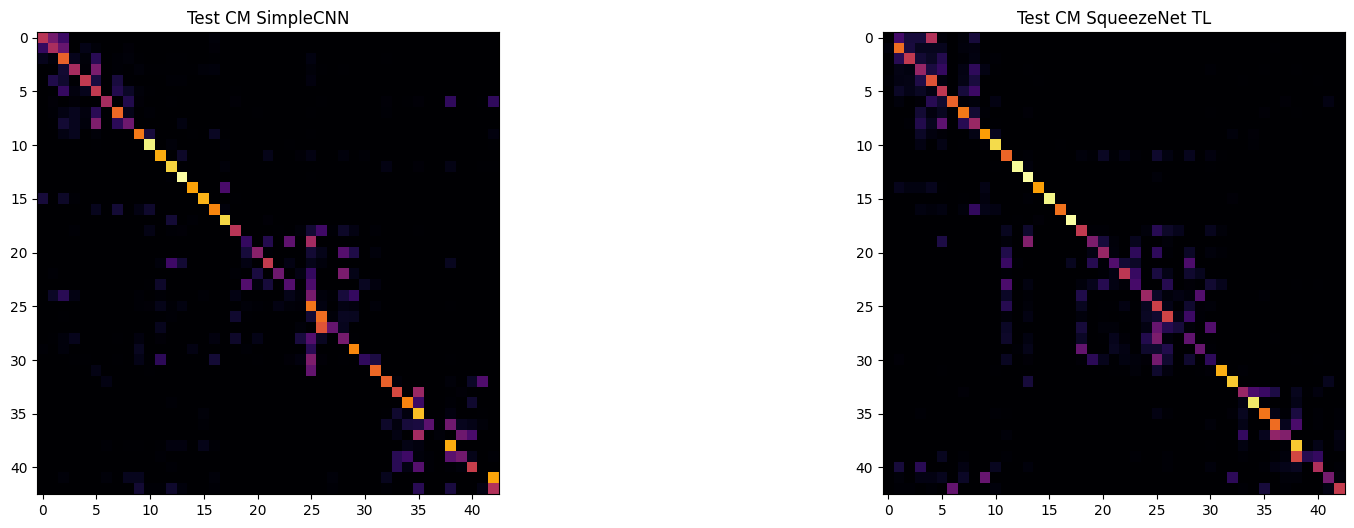

In [63]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title("Test CM SimpleCNN")
plt.imshow(test_cm, cmap="inferno")
plt.subplot(1, 2, 2)
plt.title("Test CM SqueezeNet TL")
_ = plt.imshow(test_cm_squeeze, cmap="inferno")

#### Summarize metrics from CMs

In [64]:
def compute_metrics_from_cm(conf_matrix):
    per_class_acc = np.diag(conf_matrix)
    per_class_prec = np.diag(conf_matrix) / (conf_matrix.sum(axis=0) + 1e-7)

    return per_class_acc, per_class_prec

In [65]:
acc_simple, prec_simple = compute_metrics_from_cm(test_cm)
acc_squeeze, prec_squeeze = compute_metrics_from_cm(test_cm_squeeze)

In [70]:
import pandas as pd

df = pd.DataFrame({
    "Class": label_map.values(),
    "Simple CNN Accuracy": acc_simple,
    "Simple CNN Precision": prec_simple,
    "SqueezeNet Accuracy": acc_squeeze,
    "SqueezeNet Precision": prec_squeeze
})

df_overall  = pd.DataFrame({"Class": ["Overall Performance"],
                            "Simple CNN Accuracy": [np.mean(acc_simple)],
                            "Simple CNN Precision": [np.mean(prec_simple)],
                            "SqueezeNet Accuracy": [np.mean(acc_squeeze)],
                            "SqueezeNet Precision": [np.mean(prec_squeeze)]
                           })

line = [':------------------------']
df = pd.concat([df, 
                pd.DataFrame({
                    'Class': line,
                    "Simple CNN Accuracy": line,
                    "Simple CNN Precision": line,
                    "SqueezeNet Accuracy": line,
                    "SqueezeNet Precision": line
                }),
                df_overall], 
               ignore_index=True)

df_markdown = df.to_markdown(index=False)

In [60]:
print(df_markdown)

| Class                                            | Simple CNN Accuracy       | Simple CNN Precision      | SqueezeNet Accuracy       | SqueezeNet Precision      |
|:-------------------------------------------------|:--------------------------|:--------------------------|:--------------------------|:--------------------------|
| Limitează la 20 km/h                             | 0.3333333333333333        | 0.9076841262211353        | 0.9666666666666667        | 0.9999998965517349        |
| Limitează la 30 km/h                             | 0.925                     | 0.5392577132591612        | 0.9430555555555555        | 0.949600579161682         |
| Limitează la 50 km/h                             | 0.884                     | 0.8628107888227834        | 0.9786666666666667        | 0.8290873872610143        |
| Limitează la 60 km/h                             | 0.8466666666666667        | 0.7404922221030833        | 0.8311111111111111        | 0.9999998796791589        |
| Limiteaz

By using [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method you can save the table and convert it to LaTeX format using [this online tool](https://www.tablesgenerator.com/latex_tables), in order to organize your results more quickly.

#### Save the entire model for the next lab session ...

In [71]:
torch.save(squeezenet, os.path.join(folder_path_tl, "full_finetuned_mode.pht"))

---

## **Music Genre Classification** <a class="anchor" id="other_cnn"></a>

### GTZAN dataset 🎵

The [GTZAN](https://paperswithcode.com/dataset/gtzan) dataset is a widely used collection of audio clips for music genre classification research. It consists of 1,000 audio tracks, each 30 seconds in duration, spanning across 10 different music genres (blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae, and rock). 

#### Download and Extract GTZAN archive

In [81]:
gtzan_url = "https://huggingface.co/datasets/marsyas/gtzan/resolve/main/data/genres.tar.gz"

In [82]:
import tarfile
import os
from urllib import request

if not os.path.exists(os.path.join("./data", "gtzan.tar.gz")):
    request.urlretrieve(gtzan_url, os.path.join("./data", "gtzan.tar.gz"))

In [83]:
if not os.path.exists(os.path.join("data", "gtzan")):
    with tarfile.open(os.path.join("data", "gtzan.tar.gz"), "r:gz") as tar:
        tar.extractall(os.path.join("data", "gtzan"))

#### Create the `Dataset`

In [84]:
from torch.utils.data import Dataset
import librosa
import numpy as np

class GTZANdataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.classes = sorted(
            [x for x in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, x))]
        )
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.samples = self._make_file_list()
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        file_path, label = self.samples[idx]
        waveform, sample_rate = librosa.load(file_path)
        
        if self.transform:
            waveform = self.transform(waveform)

        return waveform, label

    def _make_file_list(self):
        file_list = []
        for class_name in self.classes:
            class_dir = os.path.join(self.root_dir, class_name)
            for file_name in os.listdir(class_dir):
                if not file_name.startswith('._'):
                    file_path = os.path.join(class_dir, file_name)
                    ### Keep only those files that can bee read
                    try: 
                        _ = librosa.load(file_path)
                        file_list.append((file_path, self.class_to_idx[class_name]))
                    except:
                        print(f"Couldn't load {file_path}. Keeping it out.")
        return file_list

In [85]:
gtzan_dataset = GTZANdataset("data/gtzan/genres")

/tmp/ipykernel_3912986/3159508267.py:36: UserWarning: PySoundFile failed. Trying audioread instead.
  _ = librosa.load(file_path)
/home/opis/vvasiles/.conda/envs/ia2/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Couldn't load data/gtzan/genres/jazz/jazz.00054.wav. Keeping it out.


In [86]:
gtzan_dataset.class_to_idx

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

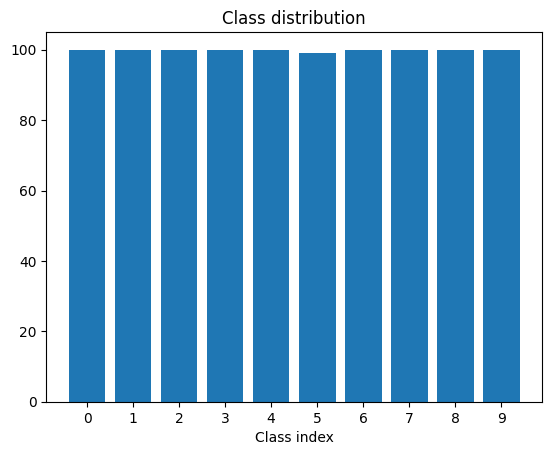

In [87]:
import matplotlib.pyplot as plt

label_counts = [0] * 10
for x, y in gtzan_dataset.samples:
    label_counts[y] += 1

plt.figure()
plt.title("Class distribution")
plt.bar(list(range(10)), label_counts)
plt.xticks(list(range(10)))
plt.xlabel("Class index")
plt.show()

In [88]:
idx_to_class_gtzan = {v: k for k, v in gtzan_dataset.class_to_idx.items()}

#### Display some waveforms

In [89]:
from IPython.display import Audio, display, HTML

def display_plot(i, dset):
    x, y = dset[i]
    if not isinstance(x, np.ndarray):
        x = x.data.numpy()[0]
        y = int(y.data.numpy())

    plt.figure(figsize=(15, 4))
    librosa.display.waveshow(x, sr=22050)

    audio_html = Audio(data=x, rate=22050)._repr_html_()
    
    centered_html = f"""
    <br>
    <div style="display: flex; justify-content: center;">
        Label: {idx_to_class_gtzan[y]} ({y})
    </div>
    <div style="display: flex; justify-content: center;">
        {audio_html}
    </div>
    """
    display(HTML(centered_html))

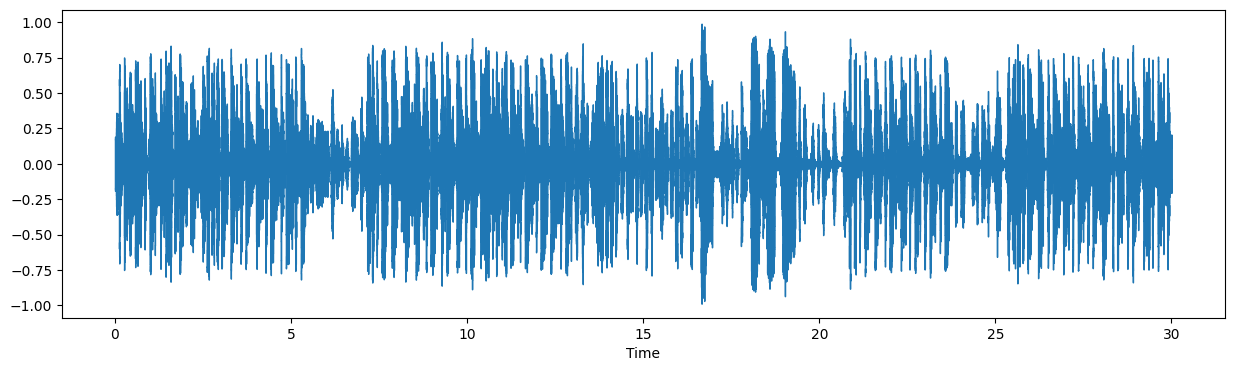

In [90]:
i = np.random.randint(0, len(gtzan_dataset))
display_plot(i, gtzan_dataset)

#### Split tracks into Train/Test and create Segmented Datasets

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_indices(samples, test_size=0.2, random_state=42):
    # Extract labels and convert them to numpy array
    labels = np.array([sample[1] for sample in samples])

    # Initialize StratifiedShuffleSplit with desired test size and random state
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)

    # Get the train and test indices
    train_idx, test_idx = next(splitter.split(samples, labels))

    return train_idx, test_idx

In [93]:
train_idx, test_idx = split_indices(gtzan_dataset.samples, test_size=0.2, random_state=42)
len(train_idx), len(test_idx)

(799, 200)

**All segments extracted from the same song should either be in train or test, but not both!**

In [99]:
import torch

class SegmentedGTZANdataset(Dataset):
    """
    Dataset of windowed audio segments.
    """
    def __init__(self, original_dataset, indices, segment_length, overlap):
        self.original_dataset = original_dataset
        self.indices = indices
        self.segment_length = segment_length
        self.overlap = overlap

        # Create segmented dataset
        self.segmented_data = self._segment_tracks()

    def __len__(self):
        return len(self.segmented_data)

    def __getitem__(self, idx):
        return self.segmented_data[idx]

    def _segment_tracks(self):
        segmented_data = []
        window = np.hamming(self.segment_length)
        
        for idx in self.indices:
            # Load audio track
            audio_data, label = self.original_dataset[idx]

            # Get segment start indices
            start_indices = list(range(0, len(audio_data) - self.segment_length + 1, self.segment_length - int(self.segment_length * self.overlap)))

            # Segment audio track
            for start_idx in start_indices:
                end_idx = start_idx + self.segment_length
                segment = audio_data[start_idx: end_idx]

                # Apply Hamming window to the segment
                segment = segment * window

                # Add segment and label to segmented data
                segmented_data.append((
                    torch.FloatTensor(segment)[None, ...], torch.LongTensor([label]).squeeze()
                ))
            
        return segmented_data

In [95]:
sr = 22050
segment_length = 5 * sr
overlap = 0.25 # fraction

gtzan_train_segm = SegmentedGTZANdataset(gtzan_dataset, train_idx, segment_length, overlap)
gtzan_test_segm = SegmentedGTZANdataset(gtzan_dataset, test_idx, segment_length, overlap)

In [96]:
len(gtzan_train_segm), len(gtzan_test_segm)

(5593, 1400)

In [97]:
sig, label = gtzan_train_segm[100]
sig.shape, label

(torch.Size([1, 110250]), tensor(7))

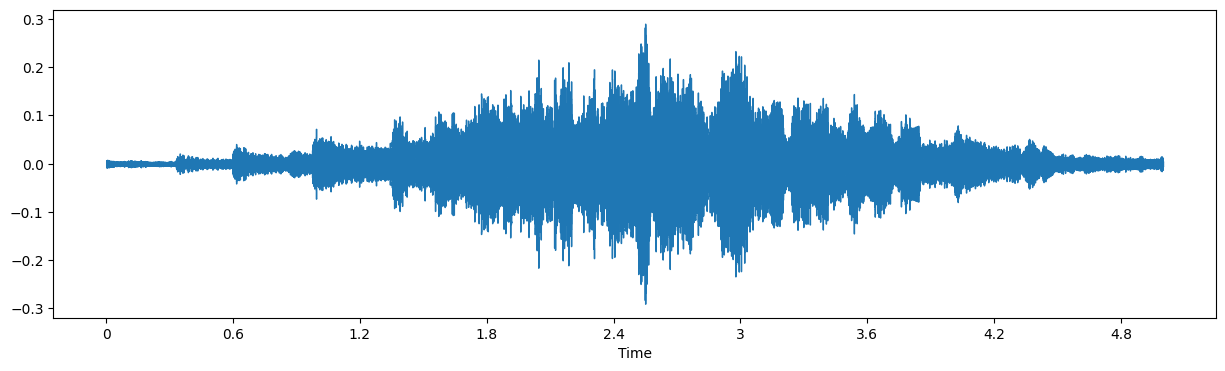

In [98]:
i = np.random.randint(0, len(gtzan_test_segm))
display_plot(i, gtzan_test_segm)

### **$1^{st}$ Method**: Raw Signal classification using 1D convolutions

In [100]:
import torch.nn as nn

class GlobalMaxPooling1D(nn.Module):
    """Custom class implementing 1D version of Adaptive maxpool 2D"""
    def __init__(self, data_format='channels_last'):
        super(GlobalMaxPooling1D, self).__init__()
    
    def forward(self, input):
        return torch.max(input, axis=-1).values

class Conv1Dnetwork(nn.Module):
    def __init__(self, in_ch, n_classes):
        super(Conv1Dnetwork, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, 32, kernel_size=9),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=16, stride=16),
            nn.Conv1d(32, 32, kernel_size=7),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=8, stride=8),
            nn.Conv1d(32, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4),
            nn.Conv1d(64, 64, kernel_size=3),
            nn.ReLU(),
        )

        self.global_pool = GlobalMaxPooling1D()
        
        self.dense = nn.Sequential(
            nn.Linear(64, n_classes)
        )

    def forward(self, x):
        z1 = self.conv(x)
        z2 = self.global_pool(z1)
        z3 = self.dense(z2)

        return z3

In [101]:
from torchsummary import summary

raw_model = Conv1Dnetwork(1, 10)

summary(raw_model, (1, 5 * sr), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1           [-1, 32, 110242]             320
              ReLU-2           [-1, 32, 110242]               0
         MaxPool1d-3             [-1, 32, 6890]               0
            Conv1d-4             [-1, 32, 6884]           7,200
              ReLU-5             [-1, 32, 6884]               0
         MaxPool1d-6              [-1, 32, 860]               0
            Conv1d-7              [-1, 64, 856]          10,304
              ReLU-8              [-1, 64, 856]               0
         MaxPool1d-9              [-1, 64, 214]               0
           Conv1d-10              [-1, 64, 212]          12,352
             ReLU-11              [-1, 64, 212]               0
GlobalMaxPooling1D-12                   [-1, 64]               0
           Linear-13                   [-1, 10]             650
Total params: 30,826
Trainable params:

In [102]:
import torch_utils
from torch.utils.data import DataLoader

batch_size = 32
lr = 1e-3
print_frequency = 1
epochs = 10

gtzan_train_segm_dl = DataLoader(gtzan_train_segm, batch_size=batch_size, shuffle=True)
gtzan_test_segm_dl = DataLoader(gtzan_test_segm, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(raw_model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/gtzan_raw"
file_name = "model.pth"

_ = torch_utils.train_loop(
    raw_model, 
    train_loader=gtzan_train_segm_dl, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=gtzan_test_segm_dl, 
    device="cuda", 
    folder_path=folder_path, 
    file_name=file_name, 
)

  0%|          | 0/175 [00:00<?, ?it/s]

100%|██████████| 44/44 [00:00<00:00, 117.95it/s]


Epoch 1/10: train_loss=2.0990674373081752 train_acc=0.20740210978008225 test_loss=1.935598294843327 test_acc=0.23357142857142857


100%|██████████| 44/44 [00:00<00:00, 122.14it/s]


Epoch 2/10: train_loss=1.7409733295440675 train_acc=0.3584838190595387 test_loss=1.7129093381491574 test_acc=0.3607142857142857


100%|██████████| 44/44 [00:00<00:00, 121.92it/s]


Epoch 3/10: train_loss=1.5509418542044504 train_acc=0.44484176649383156 test_loss=1.580570019104264 test_acc=0.4421428571428571


100%|██████████| 44/44 [00:00<00:00, 122.24it/s]


Epoch 4/10: train_loss=1.3912054167475019 train_acc=0.5174325049168603 test_loss=1.5951256101781672 test_acc=0.4442857142857143


100%|██████████| 44/44 [00:00<00:00, 124.10it/s]


Epoch 5/10: train_loss=1.2679408710343496 train_acc=0.5637403897729304 test_loss=1.4635205891999332 test_acc=0.5057142857142857


100%|██████████| 44/44 [00:00<00:00, 123.80it/s]


Epoch 6/10: train_loss=1.1592239560399737 train_acc=0.6046844269622743 test_loss=1.3223875761032104 test_acc=0.5578571428571428


100%|██████████| 44/44 [00:00<00:00, 121.07it/s]


Epoch 7/10: train_loss=1.0917596970285688 train_acc=0.6277489719291972 test_loss=1.3410710489208049 test_acc=0.5564285714285714


100%|██████████| 44/44 [00:00<00:00, 122.34it/s]


Epoch 8/10: train_loss=1.0224506541660854 train_acc=0.6465224387627392 test_loss=1.2861189835450866 test_acc=0.5907142857142857


100%|██████████| 44/44 [00:00<00:00, 120.19it/s]


Epoch 9/10: train_loss=0.9711128994396755 train_acc=0.6688718040407653 test_loss=1.2335792102596976 test_acc=0.6028571428571429


100%|██████████| 44/44 [00:00<00:00, 118.76it/s]

Epoch 10/10: train_loss=0.9204377663135529 train_acc=0.6853209368853924 test_loss=1.3477108749476345 test_acc=0.575


In [103]:
from sklearn.metrics import confusion_matrix

y_test, y_test_pred = torch_utils.get_prediction_targets(raw_model, gtzan_test_segm_dl, device="cuda")

test_cm_raw = confusion_matrix(y_test, y_test_pred, normalize="true")
raw_metrics_gtzan = compute_metrics_from_cm(test_cm_raw)

100%|██████████| 44/44 [00:00<00:00, 155.84it/s]


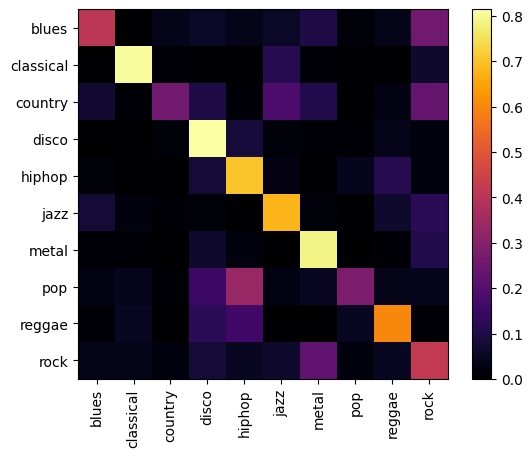

In [104]:
plt.imshow(test_cm_raw, cmap="inferno")
plt.xticks(ticks=list(range(10)), labels=[idx_to_class_gtzan[i] for i in range(10)], rotation='vertical')
plt.yticks(ticks=list(range(10)), labels=[idx_to_class_gtzan[i] for i in range(10)])
plt.colorbar()

#### Visualize the frequency response of first layers' filters

In [106]:
filters = raw_model.conv[0].weight.detach().squeeze().cpu().numpy()
filters.shape

(32, 9)

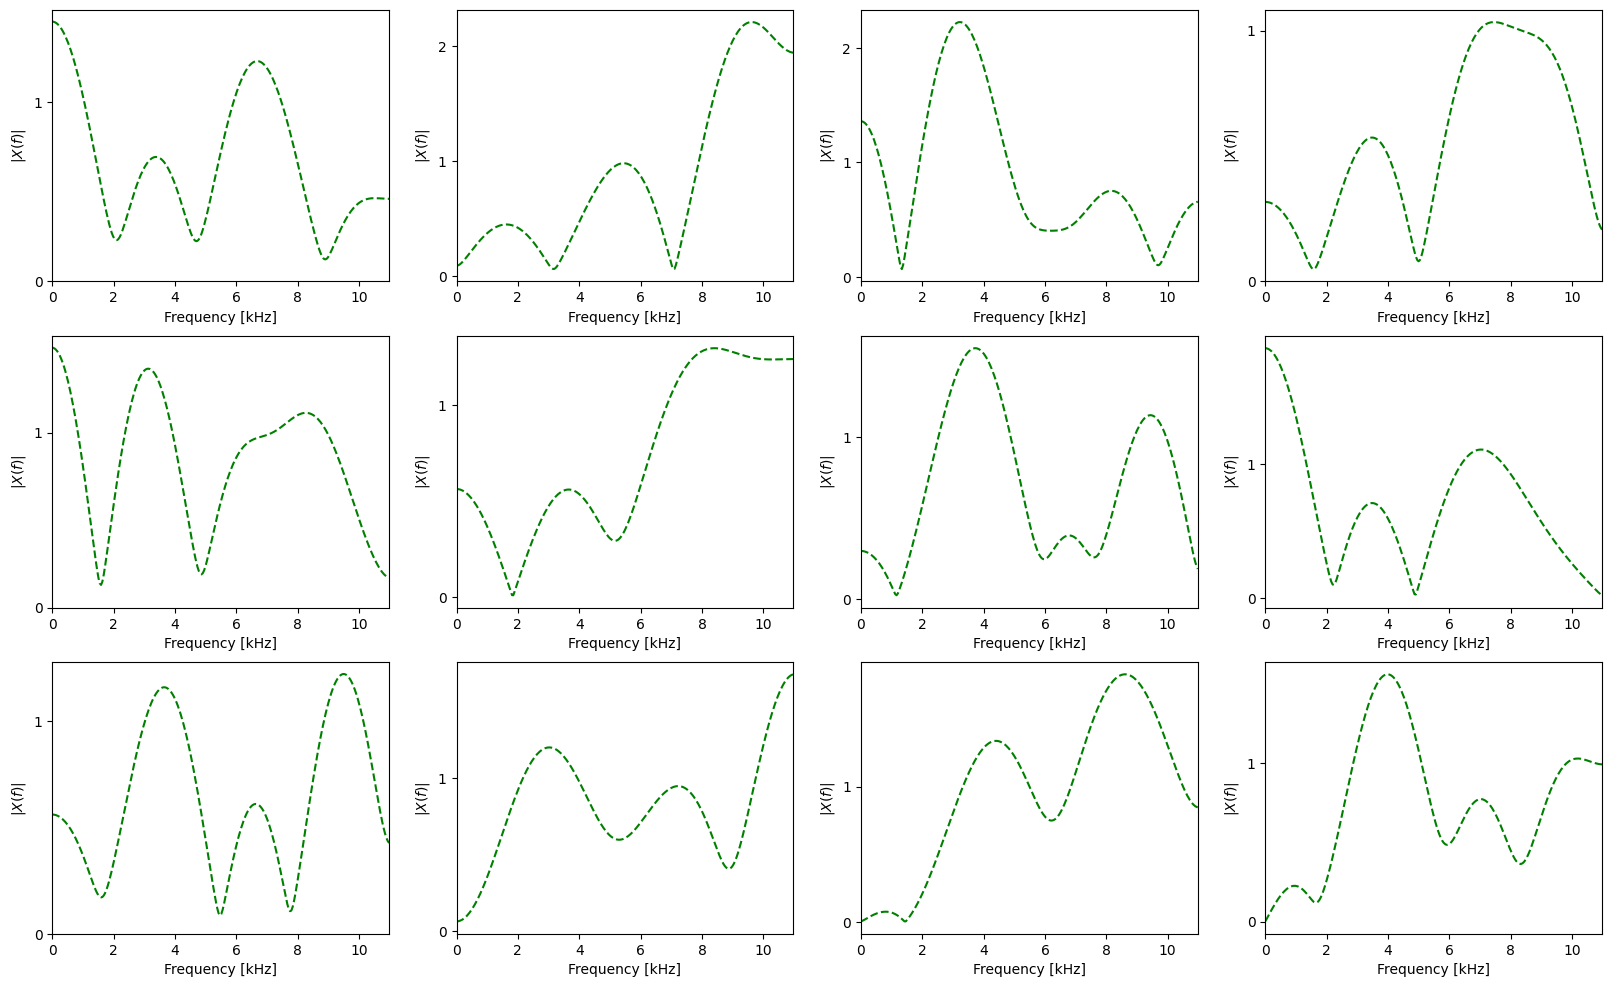

In [107]:
from scipy.signal import freqz

n_rows, n_cols = 3, 4

freq_responses = []

plt.figure(figsize=(20, n_rows * 4))
for i in range(min(n_rows * n_cols, filters.shape[0])):
    plt.subplot(n_rows, n_cols, i+1)
    
    w, h = freqz(filters[i], worN=256, fs=sr)
    w = w / 1000  # transform to kHz
    
    freq_responses.append(np.abs(h))

    plt.plot(w, np.abs(h), "g--")
    plt.xlabel("Frequency [kHz]")
    plt.ylabel("$|X(f)|$")
    plt.yticks(ticks=list(range(int(np.max(freq_responses[i])) + 1)))
    plt.xlim([0, np.max(w)])

**However**, we need to classify the 30s songs from the original test data, using the `raw_model`. How?

- Since our `raw_model` can be used on arbitrarily long sequences, you can try predicting on various segment lentghs (even the entire signal), but most certainly problems will appear
- You could try defining a *majority voting scheme*, combining the multiple predictions into a single one, for the entire audio

### $2^{nd}$ Method: Mel-Spectrogram with 1D/2D convolutions

<div style="text-align: center;">
  <img src="imgs/1d_v_2d.png" alt="description" width="1000"/>
</div>

#### Implement MelGTZANdataset class, which: 

- Receives a SegmentedGTZANdataset instance, and other mel-related parameters
- Returns samples in the form of (mel spectrogram, label)
- Implements a member function `plot_sample` which receives an integer `i` as argument and plots the mel spectrogram of the $i^{th}$ sample

See [lirbosa.feature.melspectrogram](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html), [librosa.display.specshow](https://librosa.org/doc/main/auto_examples/plot_display.html).

In [125]:
from torch.utils.data import Dataset
import librosa
from tqdm import tqdm

class MelGTZANdataset(Dataset):
    def __init__(self, segmented_dataset, sr, n_fft, hop_length, n_mels, window="hamming"):
        super(MelGTZANdataset, self).__init__()

        self.dataset = segmented_dataset

        self.mel_spec_func = lambda x: librosa.feature.melspectrogram(y=x, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, window=window)

        self.mel_samples = self._make_mels()

        self.class_to_idx = segmented_dataset.original_dataset.class_to_idx
        self.idx_to_class = {v: k for k, v in self.class_to_idx.items()}
    
    def __len__(self):
        return len(self.dataset)

    def standardize(self, mel_spec):
        return (mel_spec - torch.mean(mel_spec)) / torch.std(mel_spec)
    
    def __getitem__(self, i):
        """The mel spectrogram should be normalized first"""
        mel, label = self.mel_samples[i]
        
        return self.standardize(mel), label

    def _make_mels(self):
        specs = []

        for sig, label in tqdm(self.dataset.segmented_data):
            sig = sig.squeeze()

            mel = self.mel_spec_func(sig.numpy())
            mel = librosa.power_to_db(mel)
            mel = torch.FloatTensor(mel)
            # keep it unnormalized for plotting; normalize when __getitem__ is called

            specs.append((mel, label))

        return specs

    def plot_sample(self, i):
        M_db, label = self.mel_samples[i]

        fig, ax = plt.subplots()
        img = librosa.display.specshow(M_db.data.numpy(), y_axis='mel', x_axis='time', ax=ax)
        ax.set(title=f'Raw MelSpectrogram; Label: {self.idx_to_class[int(label.data.numpy())]}')
        fig.colorbar(img, ax=ax, format="%+2.f dB")

In [126]:
n_mels = 128
hop_length = 512
n_fft = 2048

mel_train_gtzan = MelGTZANdataset(gtzan_train_segm, sr, n_fft=2048, hop_length=512, n_mels=128)
mel_test_gtzan = MelGTZANdataset(gtzan_test_segm, sr, n_fft=2048, hop_length=512, n_mels=128)

100%|██████████| 1400/1400 [00:12<00:00, 114.19it/s]


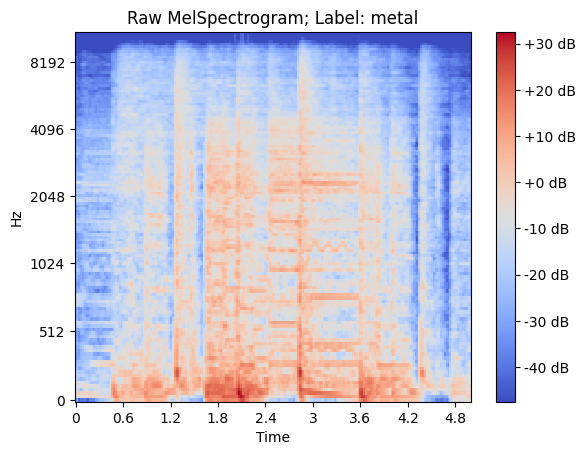

In [127]:
i = np.random.randint(0, len(mel_test_gtzan))
mel_test_gtzan.plot_sample(i)

In [128]:
spec, _ = mel_test_gtzan[i]
print("Shape of one sample: ", spec.shape)
n_windows = spec.shape[1]

Shape of one sample:  torch.Size([128, 216])


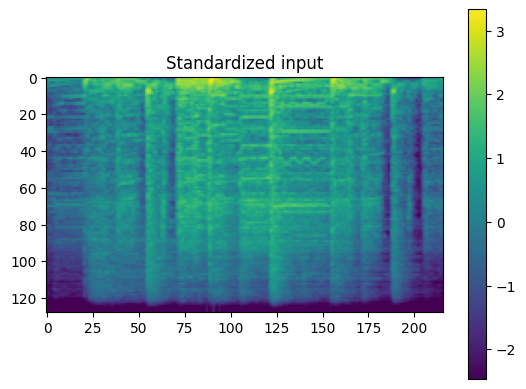

In [129]:
plt.figure()
plt.title("Standardized input")
plt.imshow(spec)
plt.colorbar()

### Implement 1D/2D CNN 

In [130]:
class SpectroCNN(nn.Module):
    def __init__(self, n_mels, n_classes, mode='2D'):
        super(SpectroCNN, self).__init__()

        # ***************************************************
        # OPTIONAL: include some random transform over the input mel-spectrogram for regularization
        self.input_transform = torchvision.transforms.Compose([
            transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            # add your own ...
        ])
        # If you don't want any transform, use self.input_transform = torchvision.transforms.Lambda(lambda x: x) := identity transform
        # ***************************************************
        
        if mode == '2D':
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: define your 2D convolutional architecture for classification 
            self.conv = nn.Sequential(
                ...
            )

            self.global_pool = ...
            
            self.dense = nn.Sequential(
                ...
            )
            # ***************************************************
        elif mode == '1D':
            self.conv = nn.Sequential(
                nn.Conv1d(in_channels=n_mels, out_channels=32, kernel_size=3, stride=3),
                nn.ReLU(),
                nn.Dropout(p=0.1),
                # nn.AvgPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=3),
                nn.ReLU(),
                nn.BatchNorm1d(64),
                nn.Dropout(p=0.2),
                # nn.AvgPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=64, out_channels=64, kernel_size=2, stride=2),
                nn.ReLU(),
                nn.BatchNorm1d(64),
                nn.Dropout(p=0.3),
                # nn.AvgPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=64, out_channels=128, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.BatchNorm1d(128),
                nn.Dropout(p=0.4),
                # nn.AvgPool1d(kernel_size=2, stride=2),
                nn.Conv1d(in_channels=128, out_channels=128, kernel_size=2, stride=1),
                nn.ReLU(),
                nn.BatchNorm1d(128),
                nn.Dropout(p=0.4)
            )
            
            self.global_pool = GlobalMaxPooling1D()
            
            self.dense = nn.Sequential(
                nn.Linear(128, n_classes)
            )
        else:
            ValueError(f"Unsupported mode {mode}.")
    
    def forward(self, x):
        if self.training:
            # Only apply random transforms on training data => we want the validation metrics on the real data
            z1 = self.conv(self.input_transform(x))
        else:
            z1 = self.conv(x)
        z2 = self.global_pool(z1)
        z3 = self.dense(z2)

        return z3

In [132]:
mel_cnn_1d = SpectroCNN(n_mels, 10, mode='1D')

summary(mel_cnn_1d, (n_mels, n_windows), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 32, 72]          12,320
              ReLU-2               [-1, 32, 72]               0
           Dropout-3               [-1, 32, 72]               0
            Conv1d-4               [-1, 64, 24]           6,208
              ReLU-5               [-1, 64, 24]               0
       BatchNorm1d-6               [-1, 64, 24]             128
           Dropout-7               [-1, 64, 24]               0
            Conv1d-8               [-1, 64, 12]           8,256
              ReLU-9               [-1, 64, 12]               0
      BatchNorm1d-10               [-1, 64, 12]             128
          Dropout-11               [-1, 64, 12]               0
           Conv1d-12              [-1, 128, 11]          16,512
             ReLU-13              [-1, 128, 11]               0
      BatchNorm1d-14              [-1, 

In [133]:
batch_size = 128
lr = 1e-3
print_frequency = 2
epochs = 10

mel_train_gtzan_dl = DataLoader(mel_train_gtzan, batch_size=batch_size, shuffle=True)
mel_test_gtzan_dl = DataLoader(mel_test_gtzan, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(mel_cnn_1d.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/gtzan_mel_1d"
file_name = "model.pth"

_ = torch_utils.train_loop(
    mel_cnn_1d, 
    train_loader=mel_train_gtzan_dl, 
    optimizer=optimizer, 
    loss=loss, 
    epochs=epochs, 
    test_loader=mel_test_gtzan_dl, 
    device="cuda", 
    folder_path=folder_path, 
    file_name=file_name,
    print_frequency=print_frequency
)

100%|██████████| 11/11 [00:00<00:00, 52.02it/s]


Epoch 2/10: train_loss=1.7331744188612157 train_acc=0.36795994993742176 test_loss=1.6636542732065374 test_acc=0.39071428571428574


100%|██████████| 11/11 [00:00<00:00, 51.93it/s]


Epoch 4/10: train_loss=1.3738730305975133 train_acc=0.4957983193277311 test_loss=1.4848602468317205 test_acc=0.4692857142857143


100%|██████████| 11/11 [00:00<00:00, 51.61it/s]


Epoch 6/10: train_loss=1.1673022915016522 train_acc=0.5750044698730556 test_loss=1.292073737491261 test_acc=0.5314285714285715


100%|██████████| 11/11 [00:00<00:00, 53.05it/s]


Epoch 8/10: train_loss=1.0427775897762992 train_acc=0.6231003039513677 test_loss=1.1760126894170588 test_acc=0.6021428571428571


100%|██████████| 11/11 [00:00<00:00, 52.70it/s]

Epoch 10/10: train_loss=0.93225128271363 train_acc=0.6665474700518506 test_loss=1.1495383327657527 test_acc=0.5928571428571429


---
---
## Homework 🔬

Implement, train and test `SpectroCNN` with `2D` Convolutions for Mel Spectrogram classification on GTZAN dataset.

You will need to:
- Complete the code for `SpectroCNN` 
- Experiment with the 2D network configuration and train it on Mel Spectrograms

You should include a discussion regarding the benefits / disadvantages of each method, with respect to performance and computational cost (i.e. inference time). Here, the inference time corresponds to the average duration needed to obtain a prediction.

In the end, you should have a table looking like this:

<table style="margin: 0px auto;">
<thead>
  <tr>
    <th>Input Type</th>
    <th>Convolution Type</th>
    <th>Test Accuracy</th>
    <th>Inference Time (s)</th>
  </tr></thead>
<tbody>
  <tr>
    <td>Raw Audio</td>
    <td>1D</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Mel Spectrogram</td>
    <td>1D</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Mel Spectrogram</td>
    <td>2D</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td></td>
  </tr>
</tbody>
</table>

---
---